In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import umap
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import SelectKBest, f_classif
import pylab
import scipy
import sklearn
import time
import seaborn as sns

In [3]:
pd.set_option("display.max_rows", 250000)

In [4]:
df = pd.read_csv('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/GSE59114.csv', header = 1)
df1 = df.T
df1.columns = df1.loc['Gene Symbol'].reset_index()
df1 = df1.drop(['Gene Symbol', 'UCSC transcripts'])
df1.columns = [x[1] for x in df1.columns]
df1.columns = df1.columns.str.replace("'", "")
df1.shape

(1434, 8422)

Itgam, Ly6g, Ptprc, Cd3e, Ly76, Kit, Ly6a, Cd48, Slamf1

In [5]:
import re
df1_1 = df1[~df1.index.str.contains('biol_replicate')]
df1_1 = df1_1.drop(['\'Young LT-HSC\'','\'Young ST-HSC\'', '\'Young MPP\'','\'Old LT-HSC\'', '\'Old ST-HSC\'','Old MPP\''])
df1_1 = df1_1.drop(['Itgam', 'Ptprc', 'Kit', 'Ly6a', 'Cd48', 'Slamf1'], axis = 1)

In [6]:
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, young_LT_HSC_2 to old_MPP_168
Columns: 8416 entries, Npl to Sft2d1
dtypes: object(8416)
memory usage: 67.9+ MB


In [7]:
df1_1.index = df1_1.index.str.replace(r'[^a-zA-Z]', '')

print((df1_1.columns).shape)
print(np.unique(df1_1.columns).shape)

(8416,)
(8351,)


In [8]:
df1_1dup = df1_1[df1_1.loc[:,df1_1.columns.duplicated()].columns]


In [9]:
dupcols = np.unique(df1_1dup.columns)
dupcols

array(['Abcg2', 'Arih1', 'Atf7ip', 'Atrip', 'Brwd1', 'Cbx1', 'Ccnd3',
       'Cdk6', 'Celf1', 'Commd1', 'Csnk1a1', 'Ctse', 'Dnajb6', 'Eci2',
       'Eif1ax', 'Fgd4', 'Fus', 'G3bp1', 'Glod4', 'Gm10598', 'Gm13215',
       'Hjurp', 'Ikbkb', 'Ing4', 'Itga4', 'Itga6', 'Kansl2', 'Lcor',
       'Lrrc29', 'Luc7l2', 'Mafg', 'Mecom', 'Mob1a', 'Mtcp1', 'Nagk',
       'Ndufa3', 'Pafah1b1', 'Patz1', 'Pcif1', 'Pik3ip1', 'Psme4', 'Pten',
       'Ramp2', 'Rpl24', 'Rspry1', 'Satb1', 'Smarcc2', 'Srcap', 'Srsf10',
       'Sugp2', 'Taf9', 'Tex261', 'Tmem167b', 'Tmem181b-ps', 'Trappc9',
       'Trim30b', 'U2af1l4', 'Utp23', 'Wwp2', 'Zbtb20', 'Zfp708',
       'Zfp869', 'Zgpat'], dtype=object)

In [10]:
df1_1dupgroup = df1_1dup.groupby(df1_1dup.columns, axis=1).sum()

In [11]:
df1_1dupmean = pd.DataFrame()
for x in dupcols:
    df1_1dupmean[x] = df1_1dupgroup[x]/df1_1dup.columns.tolist().count(x)


In [12]:
# cols = []
# n = 1
# for x in df2dup.columns:
#     if x in cols:
#         cols.append(x+'.'+str(n))
#         n += 1
#     else:
#         cols.append(x)
#         n = 1


In [13]:
dfnodup = df1_1.loc[:,~df1_1.columns.duplicated()].drop(dupcols, axis = 1)

df2 = pd.concat([dfnodup, df1_1dupmean], axis = 1)

df2= df2.round(2)
df2.shape

(1058, 8351)

In [51]:
genefracs = (df2==0).sum()/(df2==0).count()
passindex = genefracs[genefracs < 0.95]


In [52]:
zifa = df2[passindex.index]
zifa= np.round(zifa.astype(np.float64),4)
zifa = np.array(zifa)
zifa.shape

(1058, 1052)

In [53]:
from ZIFA import ZIFA
from ZIFA import block_ZIFA

In [ ]:
start_time = time.time()
Z, model_params = block_ZIFA.fitModel(zifa, 5)
print("--- %s seconds ---" % (time.time() - start_time))

Filtering out all genes which are zero in more than 95.0% of samples. To change this, change p0_thresh.
Number of blocks has been set to 2
Running block zero-inflated factor analysis with N = 1058, D = 1052, K = 5, n_blocks = 2
Block sizes [526, 526]


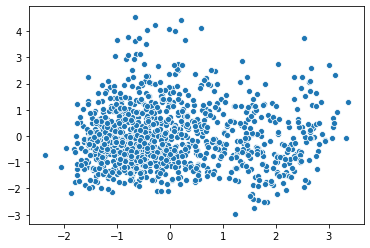

In [18]:
dfz = pd.DataFrame(Z, index = df2.index)
pcaz = PCA(n_components=2, random_state = 42)

zcomps = pcaz.fit_transform(dfz[[0,1]])
sns.scatterplot(zcomps[:,0], zcomps[:,1])
plt.show()

In [19]:
dfz

0         1         2         3         4
youngLTHSC -0.411218  0.201987  0.185048  0.095143 -0.138889
youngLTHSC -1.226819  0.359900  0.245958  0.759841 -0.332108
youngLTHSC -1.258918 -1.000117 -0.109213 -0.019549 -0.896899
youngLTHSC  0.324225 -0.930516  0.332081  1.044685 -1.074340
youngLTHSC  0.937646 -0.341425  0.756169 -0.175935 -0.809007
youngLTHSC  0.027296 -0.832679  0.868188 -0.391920 -0.955555
youngLTHSC -1.480367 -0.381064 -0.547167  0.514709 -0.053847
youngLTHSC -1.209657 -0.837371  0.679924  0.200400 -0.711127
youngLTHSC  0.048787  0.606453  0.809997  0.674747 -1.049386
youngLTHSC  0.765070 -0.980336  1.433041 -0.203238 -1.853140
youngLTHSC  2.937654 -0.491098  1.739659  1.162014 -0.477255
youngLTHSC -0.510554  0.279802  0.750670  0.753188 -0.841989
youngLTHSC  0.241167  1.576001 -0.045210  0.897989 -0.151476
youngLTHSC -1.910662 -0.785989  0.238803  0.982126 -1.109684
youngLTHSC -0.697325  0.111042  0.319314  0.482418 -0.351927
youngLTHSC  2.849193  0.304080  1.772936 -0.511946 -0.721169
youngLTHSC  0.266687  1.370390  0.576505  0.756482 -0.102564
youngLTHSC  0.965064  1.658664  0.095609  0.940333  0.743328
youngLTHSC -1.212428 -0.468730  0.143895  1.089955 -0.563229
youngLTHSC -0.364472 -0.653267 -0.103524  2.735460  0.667105
youngLTHSC  1.553597  0.065002  1.235013 -0.227054 -0.364264
youngLTHSC  0.152851 -0.293080  1.266189 -0.111659 -0.513135
youngLTHSC  0.215133  0.473975  1.155472  0.673469 -0.921993
youngLTHSC  1.157655 -2.636863  1.651135  2.544587 -0.413778
youngLTHSC  0.717061 -0.855118  1.242006 -0.444121 -1.270698
youngLTHSC  0.660504  0.799365  1.506424  0.126981 -0.459263
youngLTHSC  1.174916 -1.245771  1.481917 -0.515402 -1.039295
youngLTHSC  1.250648 -0.332632  1.882627 -1.402572 -0.938673
youngLTHSC  0.089959 -0.576282  0.676394 -0.743301 -0.335007
youngLTHSC -1.417262 -0.088138  0.308615  0.623582 -1.112868
youngLTHSC  2.038877 -0.657355  1.344866  0.826221 -0.797653
youngLTHSC  1.270116  0.026021  0.832330  3.415692  0.986910
youngLTHSC  0.815294  0.325365  1.714917 -0.080616 -0.599106
youngLTHSC -0.881255  0.539519  0.830908  1.363773 -0.197723
youngLTHSC -0.434277 -1.896116  1.041853  0.495588 -0.584522
youngLTHSC -0.131139 -0.062351  1.201343  0.490560 -0.548399
youngLTHSC -0.932581  0.555165  0.106464  0.869259  0.469803
youngLTHSC  1.265688 -1.521928  1.975861  0.424599 -1.121134
youngLTHSC  1.997117  1.896698  0.957667  0.494731  0.769687
youngLTHSC  0.834324  1.618716  0.861293  0.637452  0.477808
youngLTHSC -0.647342 -0.318893  1.000938  0.469402 -1.156913
youngLTHSC  1.309675  2.636591  1.024288  0.713104 -0.105707
youngLTHSC -0.852352  1.074308  0.235543  1.110168  0.220540
youngLTHSC  0.863258  1.380710  1.329226  0.690492 -0.106486
youngLTHSC -0.459593  0.091272  0.592910  0.514113 -0.093385
youngLTHSC -0.232457  0.389834  0.409463  0.417195  0.168884
youngLTHSC  0.422924  0.512768  0.810864  0.145484 -0.256353
youngLTHSC  0.272886  0.152656  0.741398 -0.419233 -0.132057
youngLTHSC  0.416739 -0.019069  0.703494  0.625673 -0.547114
youngLTHSC  1.028271  1.125178  0.960446  0.395385  0.119836
youngLTHSC -0.915836 -1.647650  0.904414 -0.214837 -0.838387
youngLTHSC  0.070061  1.127900  0.620735  1.180238 -0.245500
youngLTHSC  0.373983  1.579350  0.177899  1.486184  0.400637
youngLTHSC  2.294591  3.279444  0.940795  0.227183  0.263224
youngLTHSC  1.052635  0.788189  1.560186 -0.508617 -0.652682
youngLTHSC  1.378643  0.198904  1.534664 -0.207802 -0.722983
youngLTHSC  2.899568 -1.780171  2.464254  1.067832 -0.788653
youngLTHSC -0.815256  1.220296  0.985400  1.339016 -0.043745
youngLTHSC  1.551519 -0.666671  1.208175  0.199383 -1.000565
youngLTHSC -0.376017  1.064994  0.150448  0.652775  0.060731
youngLTHSC  2.182359 -0.193995  1.751505  0.570479 -1.024243
youngLTHSC  2.032293  1.408122  1.190076 -0.503658 -0.338938
youngLTHSC -0.880568  1.223081  0.077906  0.891946  0.029651
youngLTHSC -0.747099 -0.471170  0.054699  1.865731 -0.304815
youngLTHSC  1.862716  0.987842  1.290118 -0.238741 -0.

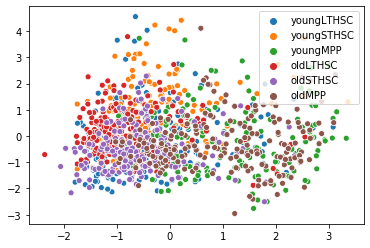

In [20]:
sns.scatterplot(zcomps[:,0], zcomps[:,1], hue = dfz.index)
plt.show()

In [21]:
np.cov(dfz)

array([[ 0.06789034,  0.18462346,  0.09338835, ..., -0.14982695,
        -0.1162369 , -0.25240392],
       [ 0.18462346,  0.5938235 ,  0.3284335 , ..., -0.50726401,
        -0.39047266, -0.85128351],
       [ 0.09338835,  0.3284335 ,  0.31100003, ..., -0.24036927,
        -0.22811557, -0.56537661],
       ...,
       [-0.14982695, -0.50726401, -0.24036927, ...,  0.54359224,
         0.53699557,  0.80921328],
       [-0.1162369 , -0.39047266, -0.22811557, ...,  0.53699557,
         0.73448346,  0.81749751],
       [-0.25240392, -0.85128351, -0.56537661, ...,  0.80921328,
         0.81749751,  1.42074166]])

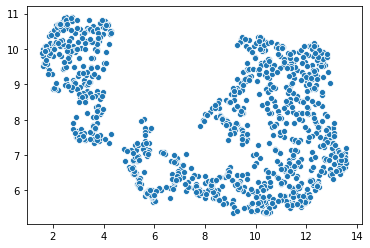

In [36]:
zumap = umap.UMAP(n_neighbors=50,
                      min_dist=.1,
                      metric='euclidean').fit_transform(dfz)
sns.scatterplot(zumap[:,0], zumap[:,1])

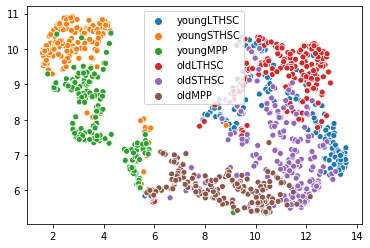

In [37]:
sns.scatterplot(zumap[:,0], zumap[:,1], hue = dfz.index)

In [38]:
gmm = GaussianMixture(n_components = 6)
gmm.fit(dfz)
cluster = gmm.fit_predict(dfz)


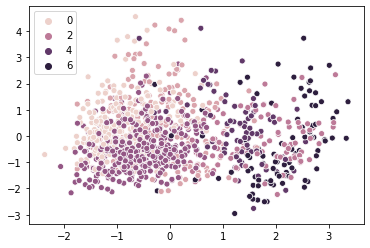

In [39]:
sns.scatterplot(zcomps[:,0], zcomps[:,1], hue = cluster)

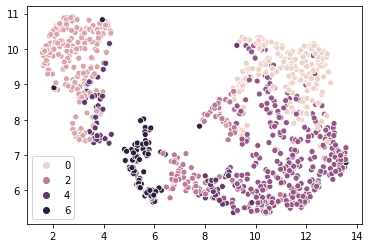

In [40]:
sns.scatterplot(zumap[:,0], zumap[:,1], hue = cluster)

In [45]:
km = KMeans(n_clusters = 8, random_state=42)
kmdata = km.fit_transform(dfz)
kpred = km.fit_predict(dfz)

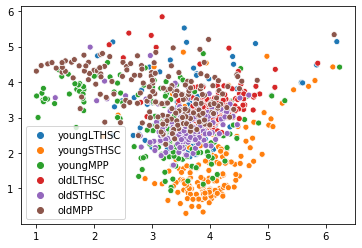

In [46]:
sns.scatterplot(kmdata[:,0], kmdata[:,1], hue = dfz.index)

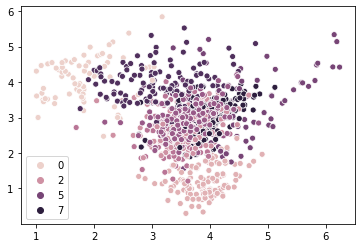

In [47]:
sns.scatterplot(kmdata[:,0], kmdata[:, 1], hue = kpred)

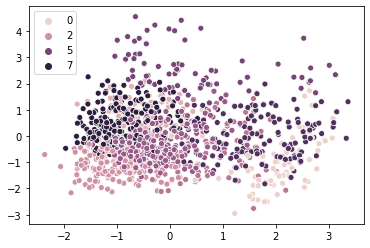

In [48]:
sns.scatterplot(zcomps[:,0], zcomps[:,1], hue = kpred)

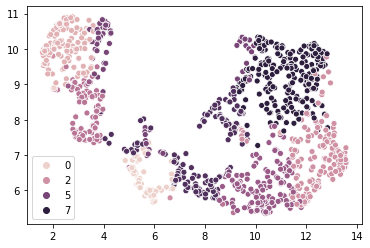

In [49]:
sns.scatterplot(zumap[:,0], zumap[:,1], hue = kpred)

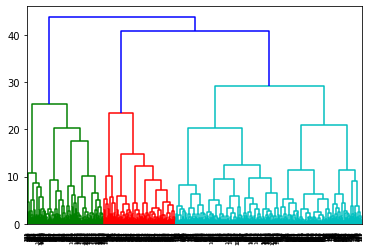

In [50]:
dendrogram(linkage(dfz, method = 'ward'))
plt.show()

In [160]:
dfcelltypes = pd.DataFrame(df2.mean(), columns = ['All cell average'])
dfcelltypes['youngLTHSC'] = df2[df2.index == 'youngLTHSC'].mean()
dfcelltypes['youngSTHSC'] = df2[df2.index == 'youngSTHSC'].mean()
dfcelltypes['youngMPP'] = df2[df2.index == 'youngMPP'].mean()
dfcelltypes['oldLTHSC'] = df2[df2.index == 'oldLTHSC'].mean()
dfcelltypes['oldSTHSC'] = df2[df2.index == 'oldSTHSC'].mean()
dfcelltypes['oldMPP'] = df2[df2.index == 'oldMPP'].mean()


In [161]:
dfcellbroad = pd.DataFrame(df2.mean(), columns = ['All cell average'])
dfcellbroad['HSC'] = df2[df2.index.str.contains('HSC')].mean()
dfcellbroad['MPP'] = df2[df2.index.str.contains('MPP')].mean()
dfcellbroad['HSC/MPP'] = dfcellbroad['HSC']/dfcellbroad['MPP']
dfcellbroad.sort_values(by = ['HSC/MPP','HSC','MPP'], ascending = False).head(25000)


All cell average  \
Efna1                                                       0.643544   
Epor                                                        0.195877   
A230065H16Rik                                               0.188853   
Entpd2                                                      0.118546   
uc012bnh.1                                                  0.012621   
Chst2                                                       0.390360   
Tenc1                                                       0.414738   
Sytl5                                                       0.261054   
Smtnl1                                                      0.344110   
Fkbp10                                                      0.207363   
Trim47                                                      0.618175   
Sdpr                                                        1.132630   
Prom2                                                       0.127064   
Gstm2                                                       0.393672   
Cldn5                                                       0.133280   
Nupr1                                                       2.090327   
Gpx3                                                        0.422264   
D630039A03Rik                                               0.693411   
Plxdc2                                                      0.888490   
Clip3                                                       0.347333   
Pde6h                                                       0.221191   
uc007cvp.1,uc007cvq.1                                       0.324404   
Snrpn                                                       0.428033   
Upp1                                                        0.927185   
Gm13986                                                     0.386996   
Ndn                                                         1.065439   
Tgm2                                                        2.373461   
Sult1a1                                                     1.656241   
Hid1                                                        0.731313   
Tgfb3                                                       0.188622   
Zfp612                                                      0.548159   
Eno2                                                        0.214290   
Hba-a2                                                      0.698456   
Mt2                                                         0.389157   
Tinagl1                                                     1.058981   
Reep2                                                       0.324417   
Ehd3                                                        0.907648   
Fam46c                                                      0.120244   
Fam110c                                                     0.711369   
Abcg3                                                       2.109270   
Clca1                                                       0.969792   
Vwf                                                         1.211336   
Clec1a                                                      1.491799   
Hbb-b1                                                      0.696732   
Kazald1                                                     0.335396   
Ocln                                                        0.451780   
Rprm                                                        0.116883   
Npdc1                                                       1.094193   
Mmrn1                                                       4.407780   
Clu                                                         1.038810   
Wfdc2                                                       0.509162   
Grb10                                                       2.193117   
Rhd                                                         0.059553   
Hgfac                                                       0.722850   
Gimap4                                                      0.461725   
Abcb1a              